In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, roc_curve, r2_score, auc, roc_auc_score, accuracy_score
from sklearn.metrics import mutual_info_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
kid = pd.read_csv("Kidney_disease.csv")
kid

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [3]:
kid.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
kid.tail()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,53,6800,6.1,no,no,no,good,no,no,notckd


In [5]:
kid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [6]:
kid.describe().T

,count,mean,std,min,25%,50%,75%,max
id,400.0,199.500000,115.614301,0.000,99.75,199.50,299.25,399.000
age,391.0,51.483376,17.169714,2.000,42.00,55.00,64.50,90.000
bp,388.0,76.469072,13.683637,50.000,70.00,80.00,80.00,180.000
sg,353.0,1.017408,0.005717,1.005,1.01,1.02,1.02,1.025
al,354.0,1.016949,1.352679,0.000,0.00,0.00,2.00,5.000
su,351.0,0.450142,1.099191,0.000,0.00,0.00,0.00,5.000
bgr,356.0,148.036517,79.281714,22.000,99.00,121.00,163.00,490.000
bu,381.0,57.425722,50.503006,1.500,27.00,42.00,66.00,391.000
sc,383.0,3.072454,5.741126,0.400,0.90,1.30,2.80,76.000
sod,313.0,137.528754,10.408752,4.500,135.00,138.00,142.00,163.000


In [7]:
kid = kid.fillna(0)
kid

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,0,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,0,normal,notpresent,notpresent,...,38,6000,0,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,0,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [8]:
kid["classification"] = (kid["classification"]=="ckd").astype(int)
kid

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,0,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,1
1,1,7.0,50.0,1.020,4.0,0.0,0,normal,notpresent,notpresent,...,38,6000,0,no,no,no,good,no,no,1
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,0,no,yes,no,poor,no,yes,1
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,0
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,0
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,0
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,0


In [9]:
kid.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [10]:
kid.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification      int64
dtype: object

In [11]:
numerical_variables = ["age", "bp", "sg", "al", "su", "bgr", "bu", "sc", "sod", "pot", "hemo"]
numerical_variables

['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo']

In [12]:
categorical_variables = ['rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane']

<Axes: >

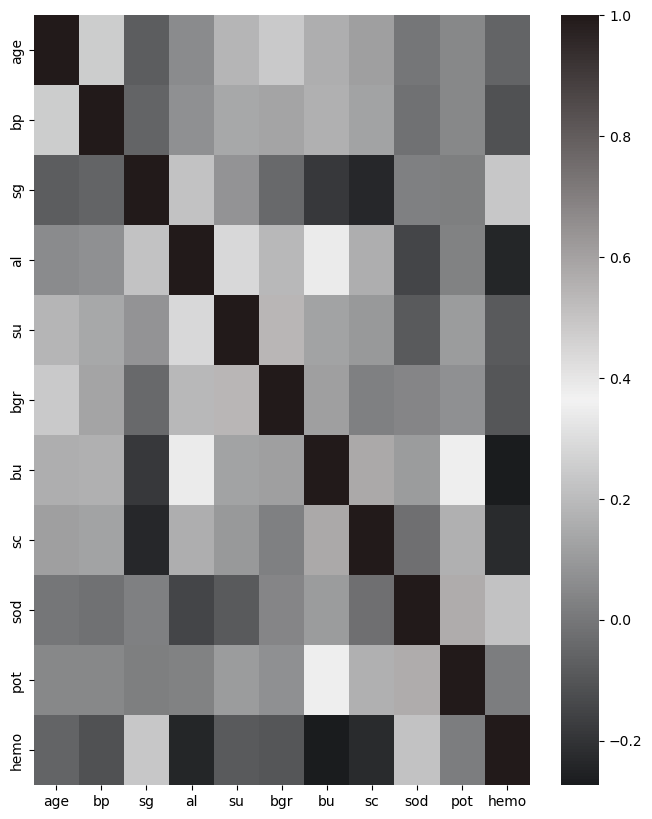

In [13]:
fig = plt.figure(figsize = (8, 10))
cmap = sns.diverging_palette(250, 10, l = 10, n = 8, s = 10, as_cmap = True)
sns.heatmap(kid[numerical_variables].corr(), cmap = cmap, fmt = '.3f')

In [14]:
kid.isnull().sum()

id                0
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [15]:
df_full_train, df_test = train_test_split(kid, test_size = 0.2, random_state = 42)
df_train, df_val = train_test_split(df_full_train, test_size = 0.25, random_state = 42)

In [16]:
len(df_train), len(df_val), len(df_test)

(240, 80, 80)

In [17]:
df_train = df_train.reset_index(drop = True)
df_val = df_val.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)

In [18]:
y_train = df_train.classification.values
y_val = df_val.classification.values
y_test = df_test.classification.values

In [19]:
del df_train["classification"]
del df_val["classification"]
del df_test["classification"]

In [20]:
dv = DictVectorizer(sparse = False)

In [21]:
train_dict = df_train[categorical_variables + numerical_variables].fillna(0).to_dict(orient = "records")
X_train = dv.fit_transform(train_dict)
X_train

array([[60.,  1.,  1., ...,  0.,  0.,  0.],
       [46.,  0.,  1., ...,  0.,  0.,  0.],
       [47.,  0.,  1., ...,  0.,  0.,  0.],
       ...,
       [40.,  0.,  1., ...,  0.,  0.,  0.],
       [44.,  0.,  1., ...,  0.,  0.,  0.],
       [34.,  0.,  0., ...,  0.,  0.,  0.]])

In [22]:
val_dict = df_val[categorical_variables + numerical_variables].fillna(0).to_dict(orient = "records")
X_val = dv.transform(val_dict)
X_val

array([[55.,  1.,  1., ...,  0.,  0.,  0.],
       [68.,  3.,  1., ...,  0.,  0.,  0.],
       [24.,  2.,  1., ...,  0.,  0.,  0.],
       ...,
       [45.,  0.,  1., ...,  0.,  0.,  0.],
       [57.,  0.,  0., ...,  0.,  0.,  0.],
       [65.,  2.,  1., ...,  0.,  0.,  0.]])

In [23]:
test_dict= df_test[categorical_variables + numerical_variables].fillna(0).to_dict(orient = "records")
X_test = dv.transform(test_dict)
X_test

array([[19.,  0.,  1., ...,  0.,  0.,  0.],
       [47.,  0.,  1., ...,  0.,  0.,  0.],
       [60.,  2.,  1., ...,  0.,  0.,  0.],
       ...,
       [75.,  0.,  1., ...,  0.,  0.,  0.],
       [21.,  4.,  0., ...,  0.,  0.,  0.],
       [42.,  0.,  1., ...,  0.,  0.,  0.]])

In [24]:
lr = LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)

C:\Users\ACE\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [25]:
y_pred = lr.predict(X_train)
y_pred

array([1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1])

In [26]:
accuracy = accuracy_score(y_train, y_pred)
accuracy

0.9958333333333333

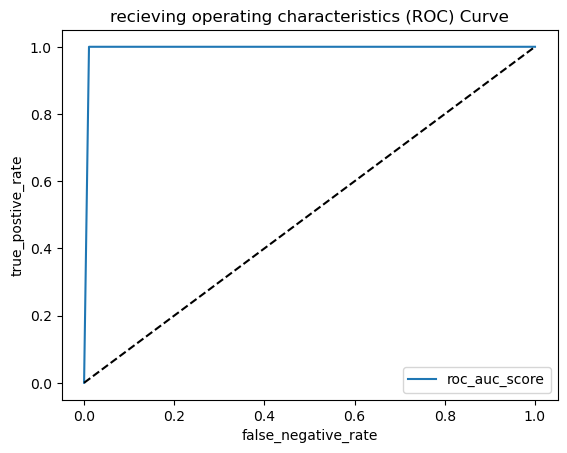

In [27]:
tpr, fpr, threshold = roc_curve(y_train, y_pred)
roc_auc = roc_auc_score(y_train, y_pred)


scores = []
plt.plot(tpr, fpr, label = "roc_auc_score")
plt.plot([0,1], [0,1],'k--')
plt.xlabel("false_negative_rate")
plt.ylabel("true_postive_rate")
plt.title("recieving operating characteristics (ROC) Curve")
plt.legend()
df_scores = scores.append((tpr, fpr, threshold))

In [28]:
auc = roc_auc_score(y_train, y_pred)
auc

np.float64(0.9945652173913043)

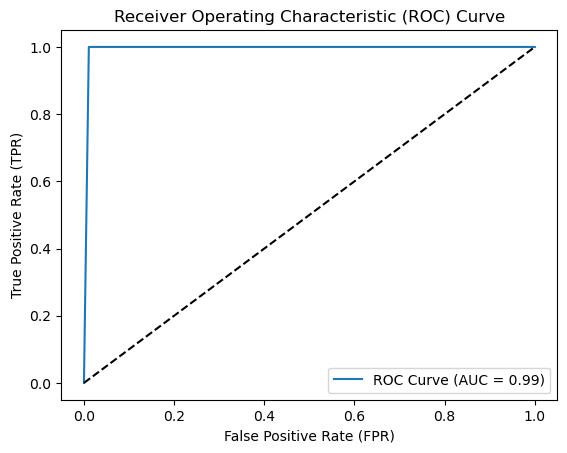

In [29]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Assuming y_pred contains the continuous probability scores (e.g., from lr.predict_proba(X_train)[:, 1])

# 1. Use roc_curve to get the plot data (FPR, TPR, Thresholds)
fpr, tpr, thresholds = roc_curve(y_train, y_pred) 

# 2. Calculate the AUC score (single value)
roc_auc = roc_auc_score(y_train, y_pred)

# 3. Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--') # Diagonal line for random chance
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.show()

In [30]:
y_preds = lr.predict(X_test)
y_preds

array([1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0])

In [31]:
accuracy = accuracy_score(y_test, y_preds)
accuracy


1.0

In [32]:
print(f"the confusion_matrix\n\n:{confusion_matrix(y_test, y_preds)}")
print(f"the classification_report\n\n:{classification_report(y_test,y_preds)}")

the confusion_matrix

:[[28  0]
 [ 0 52]]
the classification_report

:              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        52

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [33]:
print(f" the confusion_matrix\n\n :{confusion_matrix(y_train, y_pred)}")
print(f" the classification_report\n\n:{classification_report(y_train, y_pred)}")

 the confusion_matrix

 :[[ 91   1]
 [  0 148]]
 the classification_report

:              precision    recall  f1-score   support

           0       1.00      0.99      0.99        92
           1       0.99      1.00      1.00       148

    accuracy                           1.00       240
   macro avg       1.00      0.99      1.00       240
weighted avg       1.00      1.00      1.00       240



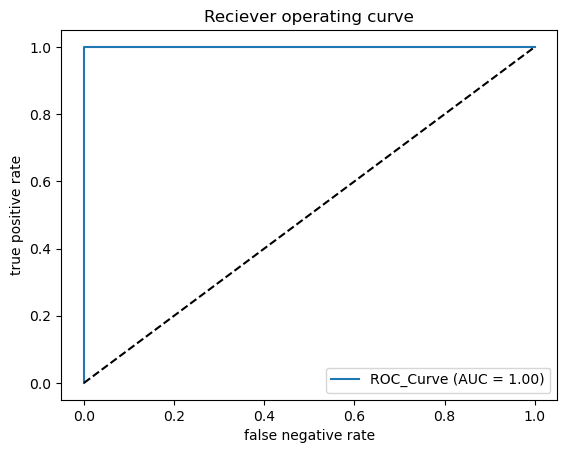

In [34]:
tpr, fpr, threshold = roc_curve(y_test, y_preds)
roc_auc = roc_auc_score(y_test, y_preds)

plt.figure()
plt.plot(tpr, fpr, label = f"ROC_Curve (AUC = {roc_auc:.2f})")
plt.xlabel("false negative rate")
plt.ylabel("true positive rate")
plt.plot([0,1], [0,1], 'k--')
plt.title("Reciever operating curve")
plt.legend()

In [35]:
rf = RandomForestClassifier(n_estimators = 9, max_depth = 42, min_samples_leaf = 6, random_state = 42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=42, min_samples_leaf=6, n_estimators=9,
                       random_state=42)

In [36]:
model = rf.predict(X_train)

In [37]:
print(f"the confusion_matrix\n\n:{confusion_matrix(y_train, model)}")
print(f"the classification_report\n\n:{classification_report(y_train,model)}")

the confusion_matrix

:[[ 89   3]
 [  0 148]]
the classification_report

:              precision    recall  f1-score   support

           0       1.00      0.97      0.98        92
           1       0.98      1.00      0.99       148

    accuracy                           0.99       240
   macro avg       0.99      0.98      0.99       240
weighted avg       0.99      0.99      0.99       240



In [38]:
accuracy = accuracy_score(y_train, model)
accuracy

0.9875

In [39]:
models = rf.predict(X_test)

In [40]:
accuracy = accuracy_score(y_test, models)
accuracy

0.975

In [41]:
print(f"the confusion_matrix\n\n:{confusion_matrix(y_test, models)}")
print(f"the classification_report\n\n:{classification_report(y_test,models)}")

the confusion_matrix

:[[26  2]
 [ 0 52]]
the classification_report

:              precision    recall  f1-score   support

           0       1.00      0.93      0.96        28
           1       0.96      1.00      0.98        52

    accuracy                           0.97        80
   macro avg       0.98      0.96      0.97        80
weighted avg       0.98      0.97      0.97        80



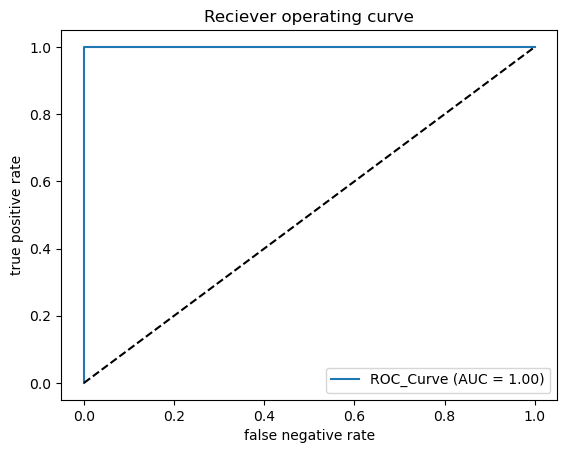

In [42]:
tpr, fpr, threshold = roc_curve(y_test, y_preds)
roc_auc = roc_auc_score(y_test, y_preds)

plt.figure()
plt.plot(tpr, fpr, label = f"ROC_Curve (AUC = {roc_auc:.2f})")
plt.xlabel("false negative rate")
plt.ylabel("true positive rate")
plt.plot([0,1], [0,1], 'k--')
plt.title("Reciever operating curve")
plt.legend()

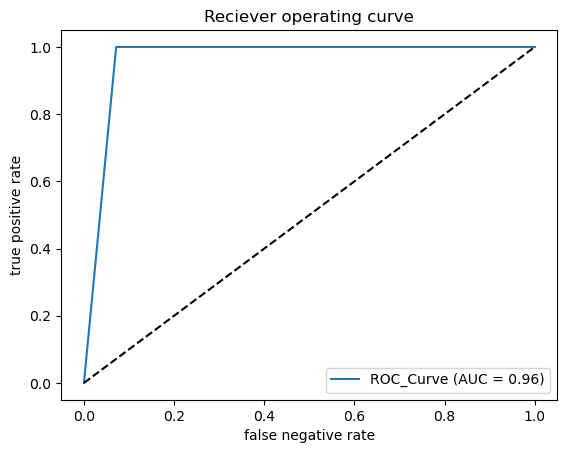

In [43]:
tpr, fpr, threshold = roc_curve(y_test, models)
roc_auc = roc_auc_score(y_test, models)

plt.figure()
plt.plot(tpr, fpr, label = f"ROC_Curve (AUC = {roc_auc:.2f})")
plt.xlabel("false negative rate")
plt.ylabel("true positive rate")
plt.plot([0,1], [0,1], 'k--')
plt.title("Reciever operating curve")
plt.legend()

In [44]:
dt = DecisionTreeClassifier(max_depth = 7, min_samples_leaf = 7, random_state = 42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=7, random_state=42)

In [45]:
mode = dt.predict(X_train)

In [46]:
accuracy = accuracy_score(y_train, mode)
accuracy


0.9625

In [47]:
modes = dt.predict(X_test)

In [48]:
accuracy = accuracy_score(y_test, modes)
accuracy

0.9625

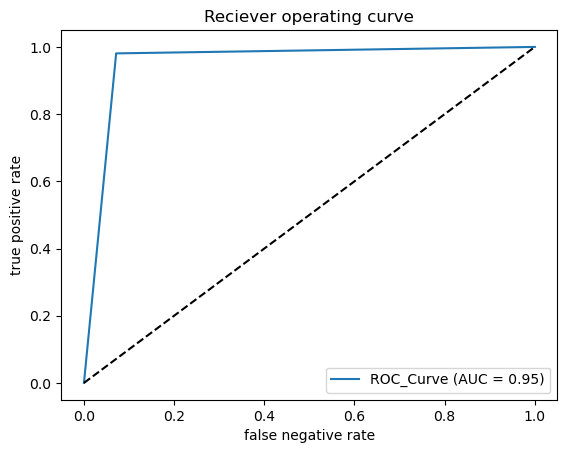

In [49]:
tpr, fpr, threshold = roc_curve(y_test, modes)
roc_auc = roc_auc_score(y_test, modes)

plt.figure()
plt.plot(tpr, fpr, label = f"ROC_Curve (AUC = {roc_auc:.2f})")
plt.xlabel("false negative rate")
plt.ylabel("true positive rate")
plt.plot([0,1], [0,1], 'k--')
plt.title("Reciever operating curve")
plt.legend()

In [50]:
svm  = SVC(kernel = "linear")
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [51]:
mods = svm.predict(X_train)

In [52]:
accuracy = accuracy_score(y_train, mods)
accuracy

1.0

In [53]:
modss = svm.predict(X_test)


In [54]:
accuracy = accuracy_score(y_test, modss)
accuracy

0.9875

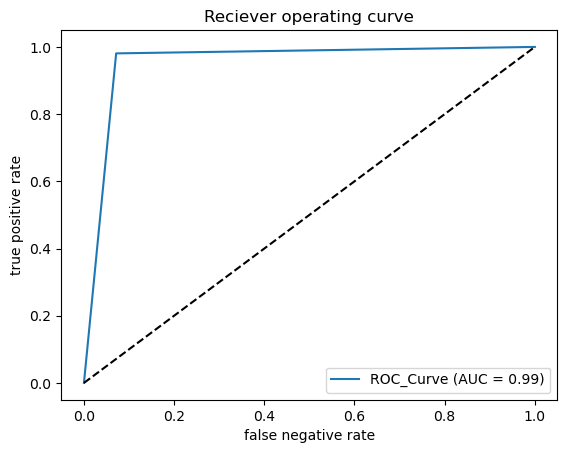

In [55]:
pr, fpr, threshold = roc_curve(y_test, modss)
roc_auc = roc_auc_score(y_test, modss)

plt.figure()
plt.plot(tpr, fpr, label = f"ROC_Curve (AUC = {roc_auc:.2f})")
plt.xlabel("false negative rate")
plt.ylabel("true positive rate")
plt.plot([0,1], [0,1], 'k--')
plt.title("Reciever operating curve")
plt.legend()

In [56]:
from xgboost import XGBClassifier

In [57]:
params = XGBClassifier(learning_rate = 0.3, max_depth = 7, min_child_weight = 8, n_estimators = 10, verbosity = 0)
params.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.3, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=8, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=10,
              n_jobs=None, num_parallel_tree=None, ...)

In [58]:
y_predt = params.predict(X_train)

In [59]:
accuracy = accuracy_score(y_train, y_predt)
accuracy

0.9875

In [60]:
print(f" the confusion_matrix is given as \n\n:{confusion_matrix(y_train, y_predt)}")
print(f" the classification_report is given by \n\n:{classification_report(y_train, y_predt)}")

 the confusion_matrix is given as 

:[[ 89   3]
 [  0 148]]
 the classification_report is given by 

:              precision    recall  f1-score   support

           0       1.00      0.97      0.98        92
           1       0.98      1.00      0.99       148

    accuracy                           0.99       240
   macro avg       0.99      0.98      0.99       240
weighted avg       0.99      0.99      0.99       240



In [61]:
y_dets = params.predict(X_test)

In [62]:
accuracy = accuracy_score(y_test, y_dets)
accuracy

0.9875

In [63]:
print(f" the confusion_matrix is given as \n\n:{confusion_matrix(y_test, y_dets)}")
print(f" the classification_report is given by \n\n:{classification_report(y_test, y_dets)}")

 the confusion_matrix is given as 

:[[28  0]
 [ 1 51]]
 the classification_report is given by 

:              precision    recall  f1-score   support

           0       0.97      1.00      0.98        28
           1       1.00      0.98      0.99        52

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



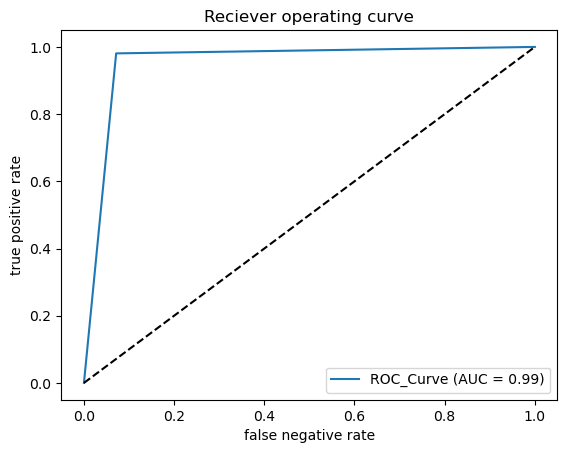

In [64]:
pr, fpr, threshold = roc_curve(y_test, y_dets)
roc_auc = roc_auc_score(y_test, y_dets)

plt.figure()
plt.plot(tpr, fpr, label = f"ROC_Curve (AUC = {roc_auc:.2f})")
plt.xlabel("false negative rate")
plt.ylabel("true positive rate")
plt.plot([0,1], [0,1], 'k--')
plt.title("Reciever operating curve")
plt.legend()